# Notebook for implementing gaussian random fields.


In [2]:
# Copyright 2022 Bipradeep Saha.
# ==============================================================================
# Generator for 2D scale-invariant Gaussian Random Fields
# ==============================================================================

In [1]:
# importing main modules for computation
import numpy as np

# importing modules for plotting
import matplotlib.pyplot as plt

In [32]:
def fftpoints(size):
    """
    Returns a numpy array with centered Fourier coordinates.

    Input Arguments:
        size (Integer): size of the grid to create
    
    Returns:
        k_array: Numpy array of shape (2, size, size) with
                 k_array[0,:,:] => x components of K-space
                 k_array[1,:,:] => y components of K-space
    """

    k_array = np.mgrid[:size, :size] - int((size+1)/2)
    # computing the Fourier coordinates
    k_array = (2*np.pi/size)*np.fft.fftshift(k_array)

    return  k_array

In [46]:
# definging function for creating a 2D Gaussian Random Field
def gaussian_random_field(alpha = 3.0,
                            size= 1024,
                            Normalize = True):
    """
    Returns a numpy array 2D GRF

    Input Arguments:
        alpha (float): Power of the powerlaw scale invariant Power Spectrum.
        size (Integer): size of the grid to create
        Normalize (Boolean): Normalize the GRF to have zero mean and unit variance.

    Returns:
        grf: Numpy array of shape (2, size, size) with
             grf[0,:,:] => x components of GRF
             grf[1,:,:] => y components of GRF
    """

    # creating Fourier coordinates
    k_array = fftpoints(size)

    # computing the amplitude of power spectrum
    amplitude = np.power(k_array[0,:,:]**2 + k_array[1,:,:]**2 + 1e-10, -(alpha/4))
    # 1e-10 is added to avoid division by zero warning.

    # ensuring the first amplitude is not infinity
    amplitude[0,0] = 0.0

    # computing complex gaussian white noise
    noise = np.random.normal(size=(size, size)) + 1j*np.random.normal(size=(size, size))

    # computing real space realization of GRF
    grf = np.fft.ifft2(amplitude * noise).real

    # normalizing the GRF
    if Normalize:
        grf = grf - np.mean(grf)
        grf = grf / np.std(grf)

    return grf
    

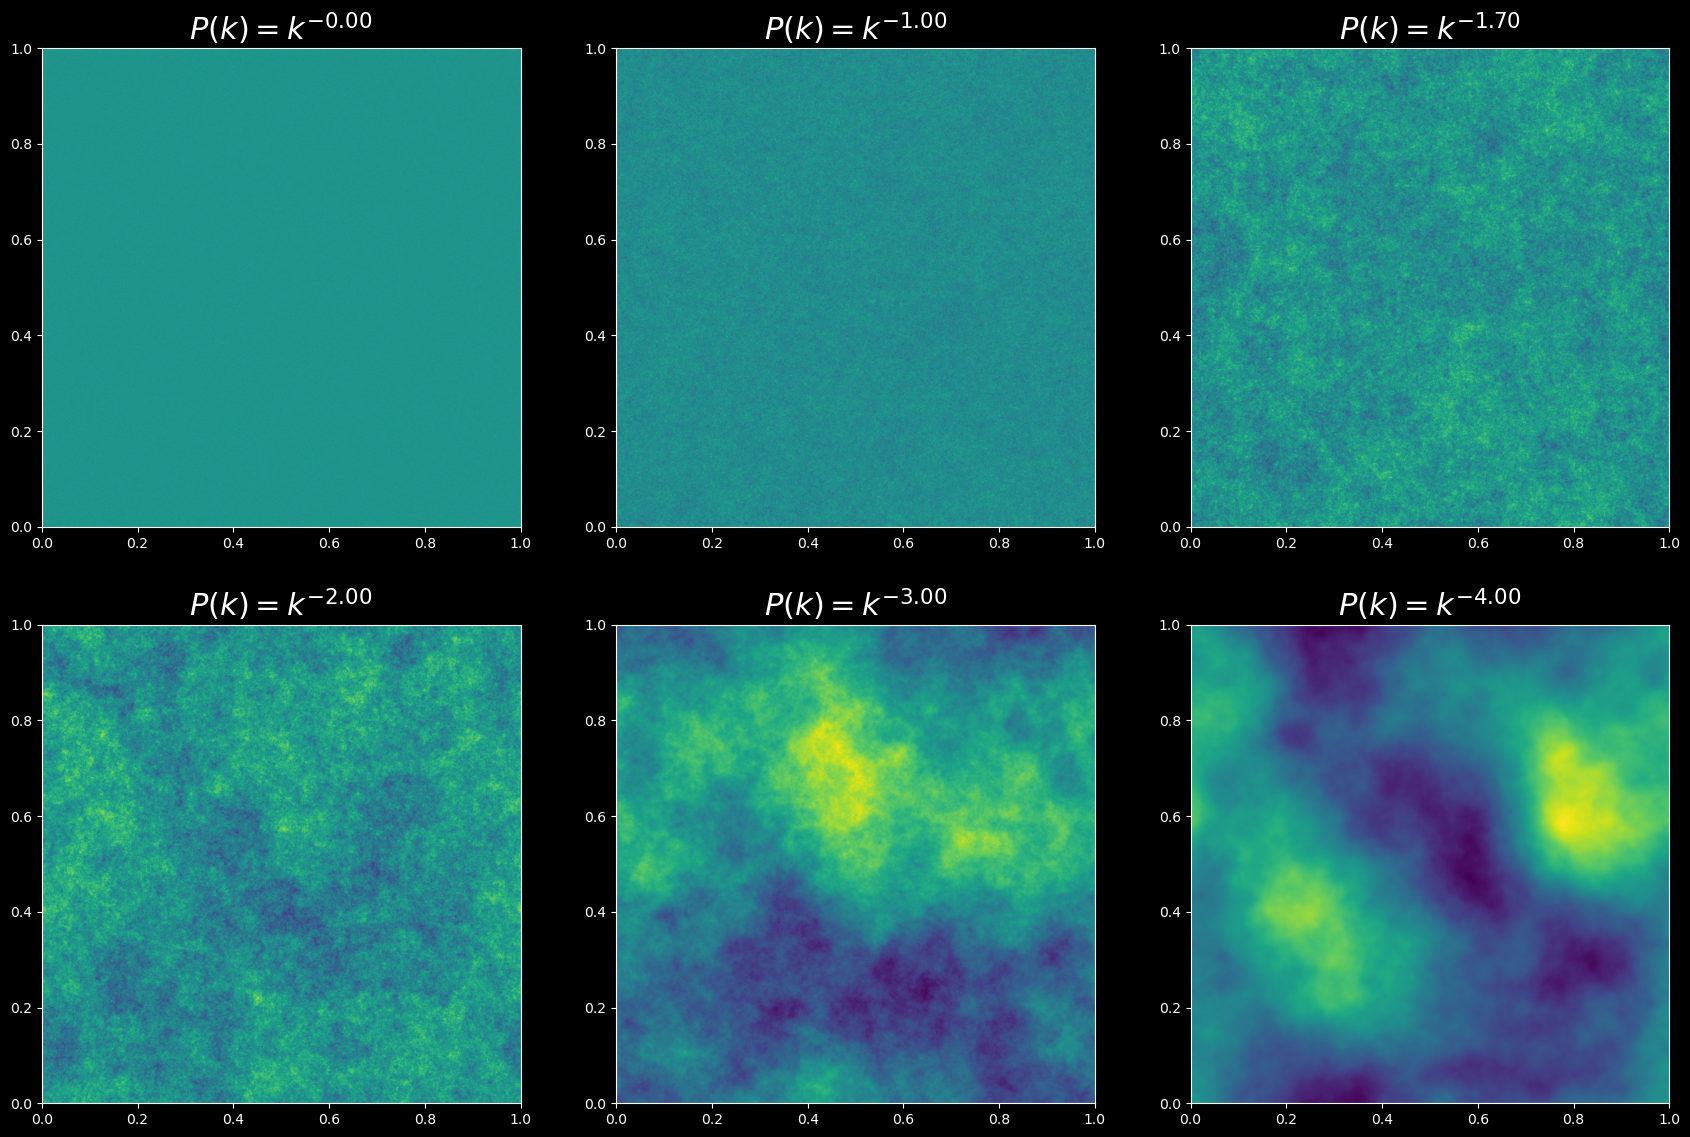

In [61]:
if __name__=='__main__':
    # defining array with different alpha values
    n = np.array([0,1,1.7,2,3,4])
    
    # computing and ploting GRFs
    fig, ax = plt.subplots(2,3, figsize=(21,14), dpi=100,  
                            gridspec_kw={'hspace':0.2, 'wspace':0.2})
    j,k=0,0
    for i in range(6):
        grf = gaussian_random_field(alpha = n[i], size=4096, Normalize=True)
        ax[j,k].imshow(grf, origin='lower', extent=[0,1,0,1])
        ax[j,k].set_title('$P(k)=k^{-%2.2f}$'%n[i], fontsize=22)
        
        k+=1
        if k==3:
            j+=1
            k=0

    plt.savefig('GRF.jpg', bbox_inches='tight', dpi=300)